<a href="https://colab.research.google.com/github/EricGuimond/ycbs255/blob/master/Homework_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Homework
Write the code outright - **Do not copy/paste from the example**
#### Instructions
1. Load the Fashion MNIST Dataset from the [keras documentation](https://keras.io/datasets/). **Use the Tensorflow version of Keras rather than the standalone Keras**
2. Visualize the data
3. Prepare the data - split, normalize and reshape
4. Train a model using using keras' functional API
5. Display the model training history in ```matplotlib```

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras


In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [8]:
tf.__version__

'2.1.0-rc1'

In [0]:
f_mnist = keras.datasets.fashion_mnist

data = f_mnist.load_data()


In [0]:
data[0][0].shape, data[0][1].shape, data[1][0].shape, data[1][1].shape

X_train, y_train, X_test, y_test = data[0][0], data[0][1], data[1][0], data[1][1]
X_train = X_train / 255
X_test = X_test / 255
class_names = [str(i) for i in range(10)]
idx = np.arange(len(X_train))
np.random.seed(42)
np.random.shuffle(idx)
X_train, y_train, X_valid, y_valid = X_train[:-10000], y_train[:-10000], X_train[-10000:], y_train[-10000:]



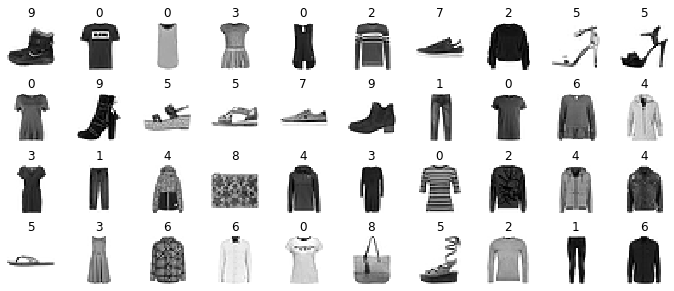

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [0]:
from tensorflow.keras import layers

In [0]:
from tensorflow.keras.layers import Flatten, Dense


In [0]:
inputs = keras.Input(shape=(28,28,))
x = Flatten() (inputs)
y = Dense(10, activation='relu') (x)
z = Dense(10, activation='relu')(y)
outputs = Dense(10, activation='sigmoid')(z)



In [0]:
func_model = keras.Model (inputs, outputs)

In [16]:
func_model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

func_model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [17]:
h = func_model.fit(X_train, y_train, batch_size=16, epochs=10, validation_data=(X_valid, y_valid))



Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 153us/sample - loss: 0.7155 - sparse_categorical_accuracy: 0.7453 - val_loss: 0.5160 - val_sparse_categorical_accuracy: 0.8253
Epoch 2/10
50000/50000 [==============================] - 7s 144us/sample - loss: 0.4874 - sparse_categorical_accuracy: 0.8315 - val_loss: 0.4676 - val_sparse_categorical_accuracy: 0.8353
Epoch 3/10
50000/50000 [==============================] - 7s 140us/sample - loss: 0.4486 - sparse_categorical_accuracy: 0.8445 - val_loss: 0.4558 - val_sparse_categorical_accuracy: 0.8377
Epoch 4/10
50000/50000 [==============================] - 7s 137us/sample - loss: 0.4288 - sparse_categorical_accuracy: 0.8506 - val_loss: 0.4780 - val_sparse_categorical_accuracy: 0.8392
Epoch 5/10
50000/50000 [==============================] - 7s 136us/sample - loss: 0.4160 - sparse_categorical_accuracy: 0.8538 - val_loss: 0.4482 - val_sparse_categorical_accuracy: 0.8403
Epoch 6/10

In [0]:
import pandas as pd


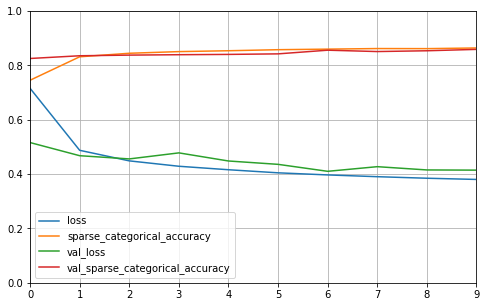

In [19]:
pd.DataFrame(h.history).plot(figsize=(8, 5), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
